# Problem 4 Medicaid & Medicare

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("hospital.csv")

dropped = data.drop(['Operating Certificate Number', 'Facility Id', 'Zip Code - 3 digits', 'Payment Typology 2', 'Payment Typology 3', 'Attending Provider License Number', 'Operating Provider License Number', 
           'Other Provider License Number', 'Birth Weight','Ethnicity','Patient Disposition','Discharge Year','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code','CCS Procedure Description','APR DRG Code','APR MDC Code',
                    'Health Service Area', 'Hospital County', 'Type of Admission', 'Abortion Edit Indicator', 'Emergency Department Indicator'], axis = 1)
dropped.shape

/Users/michaeldu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2346760, 14)

In [2]:
MountSinai = dropped[(dropped['Facility Name'] == 'Mount Sinai Hospital')]

Medicaid Payment: 14830 Medicare Payment: 18198 Other Payment Method: 22868
Total Charges Through Medicaid: $ 824348946.0200319 
Total Charges Through Medicare: $ 1300676561.5699985 
Total Charges Through Other Payments: $ 1017369547.3802004
All Charges Through The Year: $ 3142395054.970231
Percentage of Medicaid Users Among All Insurance Types: 0.2653141548590239
Percentage of Medicare Users Among All Insurance Types: 0.3255689136968656


Text(0,0.5,'Amount')

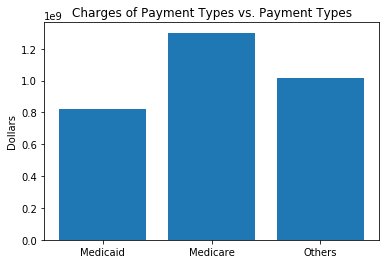

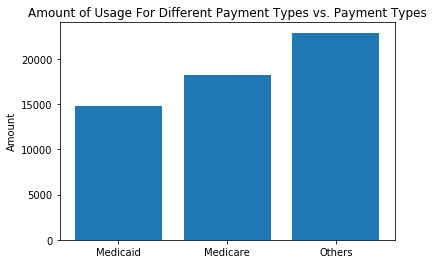

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

payment = MountSinai['Payment Typology 1']
charges = MountSinai['Total Charges'].str.replace('$', '').astype(float)
payment = np.array(payment)
charges = np.array(charges)

Medicaid_amount = 0
Medicaid_charges = 0
Medicare_amount = 0
Medicare_charges = 0
Others = 0
Others_charges = 0
for i in range(len(payment)):
    if payment[i] == 'Medicaid':
        Medicaid_amount += 1
        Medicaid_charges += charges[i]
    elif payment[i] == 'Medicare':
        Medicare_amount += 1
        Medicare_charges += charges[i]
    elif payment[i] != 'Medicaid' and payment[i] != 'Medicare':
        Others += 1
        Others_charges += charges[i]

print('Medicaid Payment:', Medicaid_amount, 'Medicare Payment:', Medicare_amount, 'Other Payment Method:', Others)
print('Total Charges Through Medicaid: $', Medicaid_charges, '\nTotal Charges Through Medicare: $', Medicare_charges, '\nTotal Charges Through Other Payments: $', Others_charges)
print('All Charges Through The Year: $', Medicaid_charges + Medicare_charges + Others_charges)
print('Percentage of Medicaid Users Among All Insurance Types:', Medicaid_amount/(Medicaid_amount+Medicare_amount+Others))
print('Percentage of Medicare Users Among All Insurance Types:', Medicare_amount/(Medicaid_amount+Medicare_amount+Others))

# Should probably use the pandas methond to do this problem because its about tables

xaxis = ['Medicaid', 'Medicare', 'Others']
yaxis = [Medicaid_charges, Medicare_charges, Others_charges]
yaxis1 = [Medicaid_amount, Medicare_amount, Others]
plt.figure(1)
plt.bar(xaxis, yaxis)
plt.title('Charges of Payment Types vs. Payment Types')
plt.ylabel('Dollars')
plt.figure(2)
plt.bar(xaxis, yaxis1)
plt.title('Amount of Usage For Different Payment Types vs. Payment Types')
plt.ylabel('Amount')

As we can see from the bar charts above, the least amount of payment type that has been used in the hospital is actually Medicaid, and follow by Medicare and other insurance payement methods. However, for the charges of using these payment types, Medicare generated the most of the charges among Medicaid and other payement types. Medicaid still is the lowest in the charges comparison. We first conclude that Medicare has more usage than Medicaid and the charges of using Medicare is much higher than the charges of using Medicaid. Since Medicare is more about providing medical services for senior citzens and disabled, it is reasonable that the charges are the highest because their diagnosis might be more serious and more expensive treaments are needed.